<h1>Anton Prykhodzka 248662 Analiza danych 14.02.2025</h1>

<h3>1.a Opis zbioru danych<h3>
Zbiór danych dotyczy grzybów i zawiera informacje o ich cechach oraz klasyfikacji na trujące i jadalne.
Dane pochodzą z plików dostarczonych: agaricus-lepiota.data, agaricus-lepiota.names, expanded.Z
Każda cecha opisuje właściwości grzyba, np. kolor kapelusza, kształt trzonu itd.
Źródło danych: UCI Machine Learning Repository.

<h3>1.b Ładowanie potrzebnych bibliotek<h3>

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

<h3>1.c Ładowanie zbioru danych<h3>

In [2]:
file_path = 'agaricus-lepiota.data'
names_path = 'agaricus-lepiota.names'
expanded_path = 'expanded.Z'

Nazwy kolumn zgodnie z plikiem .names i słownik wartości dla cech

In [3]:
columns = [
    "class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment",
    "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
    "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type",
    "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"
]

attribute_mapping = {
    "class": {"e": "edible", "p": "poisonous"},
    "cap-shape": {"b": "bell", "c": "conical", "x": "convex", "f": "flat", "k": "knobbed", "s": "sunken"},
    "cap-surface": {"f": "fibrous", "g": "grooves", "y": "scaly", "s": "smooth"},
    "cap-color": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "r": "green", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "bruises": {"t": "bruises", "f": "no"},
    "odor": {"a": "almond", "l": "anise", "c": "creosote", "y": "fishy", "f": "foul", "m": "musty", "n": "none", "p": "pungent", "s": "spicy"},
    "gill-attachment": {"a": "attached", "d": "descending", "f": "free", "n": "notched"},
    "gill-spacing": {"c": "close", "w": "crowded", "d": "distant"},
    "gill-size": {"b": "broad", "n": "narrow"},
    "gill-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "g": "gray", "r": "green", "o": "orange", "p": "pink", "u": "purple", "e": "red", "w": "white", "y": "yellow"},
    "stalk-shape": {"e": "enlarging", "t": "tapering"},
    "stalk-root": {"b": "bulbous", "c": "club", "u": "cup", "e": "equal", "z": "rhizomorphs", "r": "rooted", "?": "missing"},
    "stalk-surface-above-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-surface-below-ring": {"f": "fibrous", "y": "scaly", "k": "silky", "s": "smooth"},
    "stalk-color-above-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "stalk-color-below-ring": {"n": "brown", "b": "buff", "c": "cinnamon", "g": "gray", "o": "orange", "p": "pink", "e": "red", "w": "white", "y": "yellow"},
    "veil-type": {"p": "partial", "u": "universal"},
    "veil-color": {"n": "brown", "o": "orange", "w": "white", "y": "yellow"},
    "ring-number": {"n": "none", "o": "one", "t": "two"},
    "ring-type": {"c": "cobwebby", "e": "evanescent", "f": "flaring", "l": "large", "n": "none", "p": "pendant", "s": "sheathing", "z": "zone"},
    "spore-print-color": {"k": "black", "n": "brown", "b": "buff", "h": "chocolate", "r": "green", "o": "orange", "u": "purple", "w": "white", "y": "yellow"},
    "population": {"a": "abundant", "c": "clustered", "n": "numerous", "s": "scattered", "v": "several", "y": "solitary"},
    "habitat": {"g": "grasses", "l": "leaves", "m": "meadows", "p": "paths", "u": "urban", "w": "waste", "d": "woods"}
}

Wczytanie pliku .data i mapowanie wartości cech na pełne nazwy

In [4]:
data = pd.read_csv(file_path, header=None, names=columns)
for column, mapping in attribute_mapping.items():
    if column in data.columns:
        data[column] = data[column].map(mapping)

print(data.head())

       class cap-shape cap-surface cap-color  bruises     odor  \
0  poisonous    convex      smooth     brown  bruises  pungent   
1     edible    convex      smooth    yellow  bruises   almond   
2     edible      bell      smooth     white  bruises    anise   
3  poisonous    convex       scaly     white  bruises  pungent   
4     edible    convex      smooth      gray       no     none   

  gill-attachment gill-spacing gill-size gill-color  ...  \
0            free        close    narrow      black  ...   
1            free        close     broad      black  ...   
2            free        close     broad      brown  ...   
3            free        close    narrow      brown  ...   
4            free      crowded     broad      black  ...   

  stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
0                   smooth                  white                  white   
1                   smooth                  white                  white   
2             

<h2>2. Opis danych</h2>

<h3>2.a Statystyki opisowe</h3>

In [5]:
print("Podstawowe statystyki opisowe:")
print(data.describe(include='all'))

Podstawowe statystyki opisowe:
         class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count     8124      8124        8124      8124    8124  8124            8124   
unique       2         6           4        10       2     9               2   
top     edible    convex       scaly     brown      no  none            free   
freq      4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top           close     broad       buff  ...                   smooth   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9              

<h3>2.b Wizualizacje danych</h3>

C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\1372557828.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data["class"], palette='viridis')


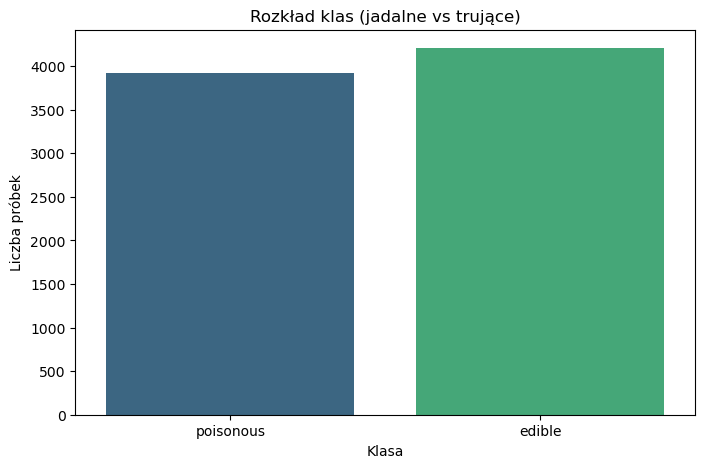

In [6]:
# Analiza ilości klas (jadalne vs trujące)
plt.figure(figsize=(8, 5))
sns.countplot(x=data["class"], palette='viridis')
plt.title("Rozkład klas (jadalne vs trujące)")
plt.xlabel("Klasa")
plt.ylabel("Liczba próbek")
plt.show()

C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\3269667174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\3269667174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\3269667174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')


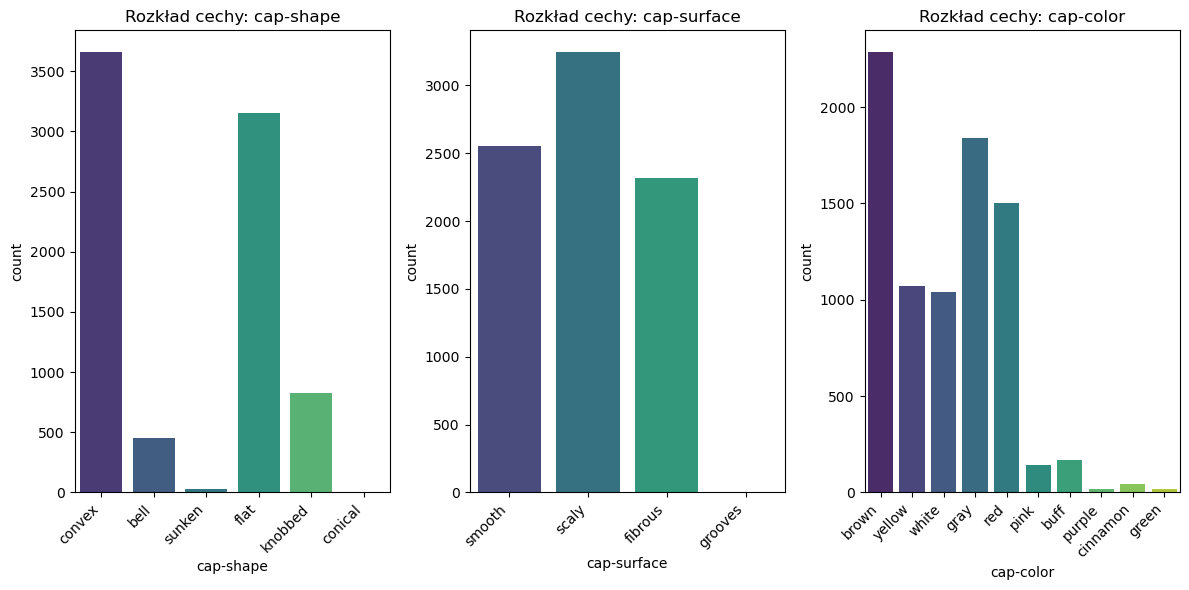

In [7]:
# Analiza cech kapelusza ("cap-shape", "cap-surface", "cap-color")
plt.figure(figsize=(12, 6))
features_group = ["cap-shape", "cap-surface", "cap-color"]
for i, feature in enumerate(features_group):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=data[feature], palette='viridis')
    plt.title(f"Rozkład cechy: {feature}")
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()


C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\4124714053.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\4124714053.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')


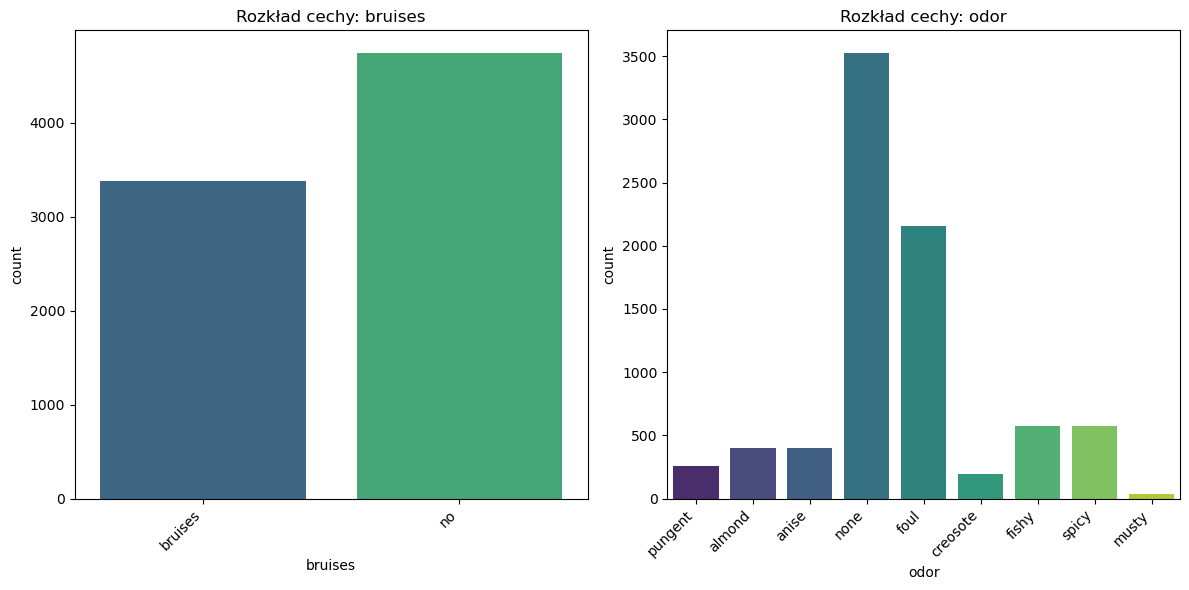

In [8]:
# Analiza bruises i odor
plt.figure(figsize=(12, 6))
features_group1 = ["bruises", "odor"]
for i, feature in enumerate(features_group1):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=data[feature], palette='viridis')
    plt.title(f"Rozkład cechy: {feature}")
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\2583641790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\2583641790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\2583641790.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\2583641790.py:6: FutureWarning: 

Passing `p

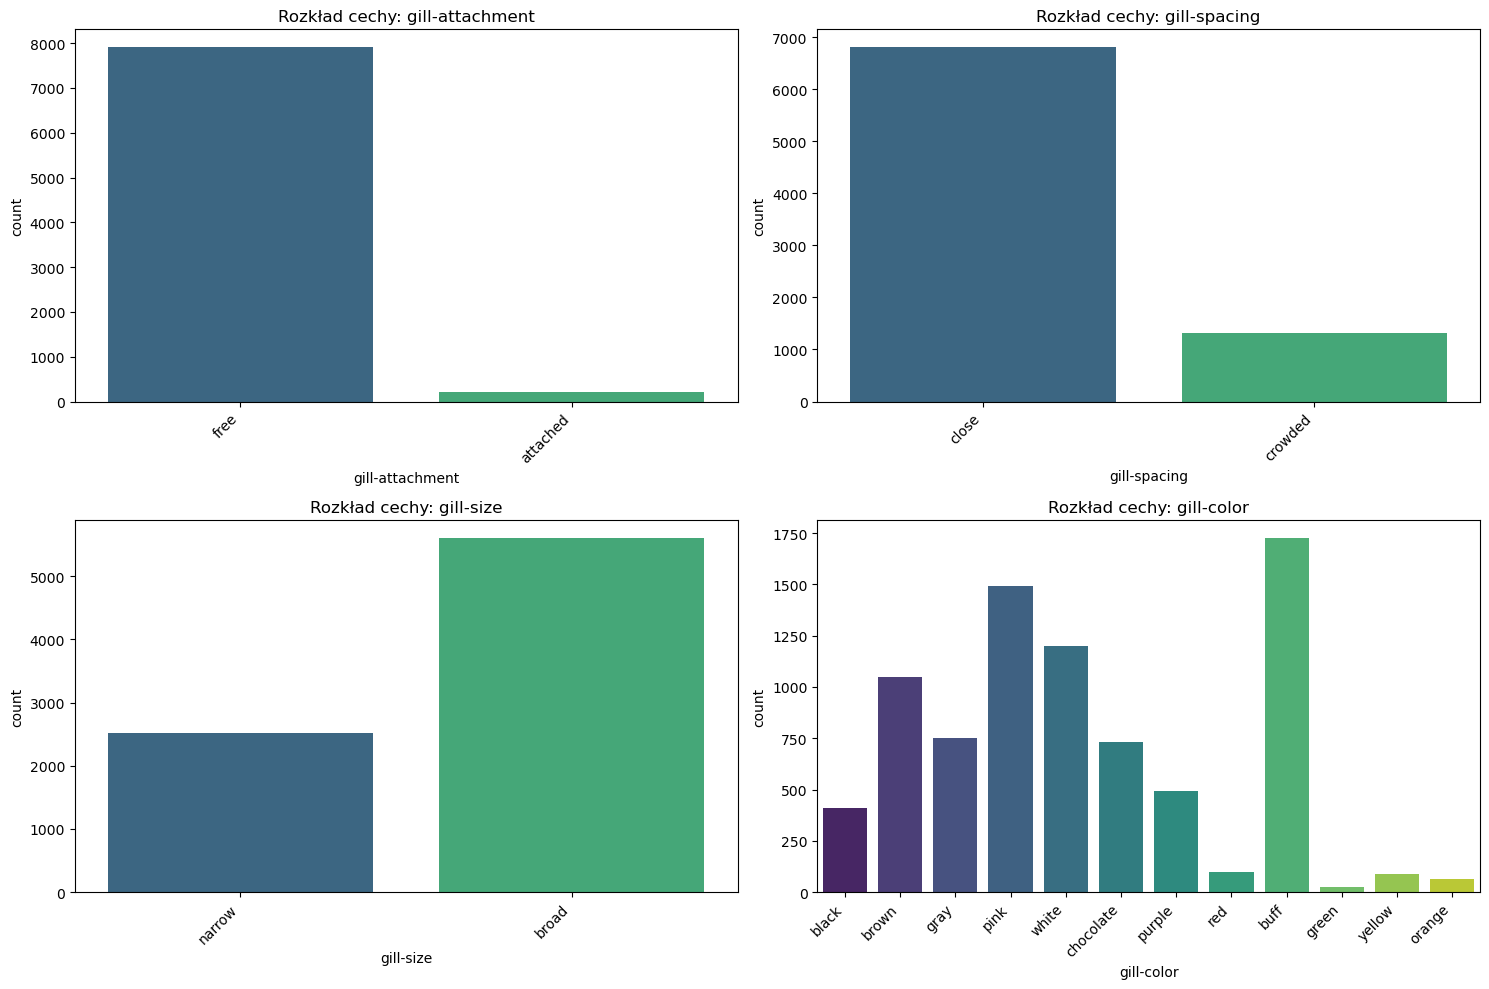

In [9]:
# Analiza cech blaszki
plt.figure(figsize=(15, 10))
features_group2 = ["gill-attachment", "gill-spacing", "gill-size", "gill-color"]
for i, feature in enumerate(features_group2):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=data[feature], palette='viridis')
    plt.title(f"Rozkład cechy: {feature}")
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\1364781862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\1364781862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\1364781862.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\1364781862.py:6: FutureWarning: 

Passing `p

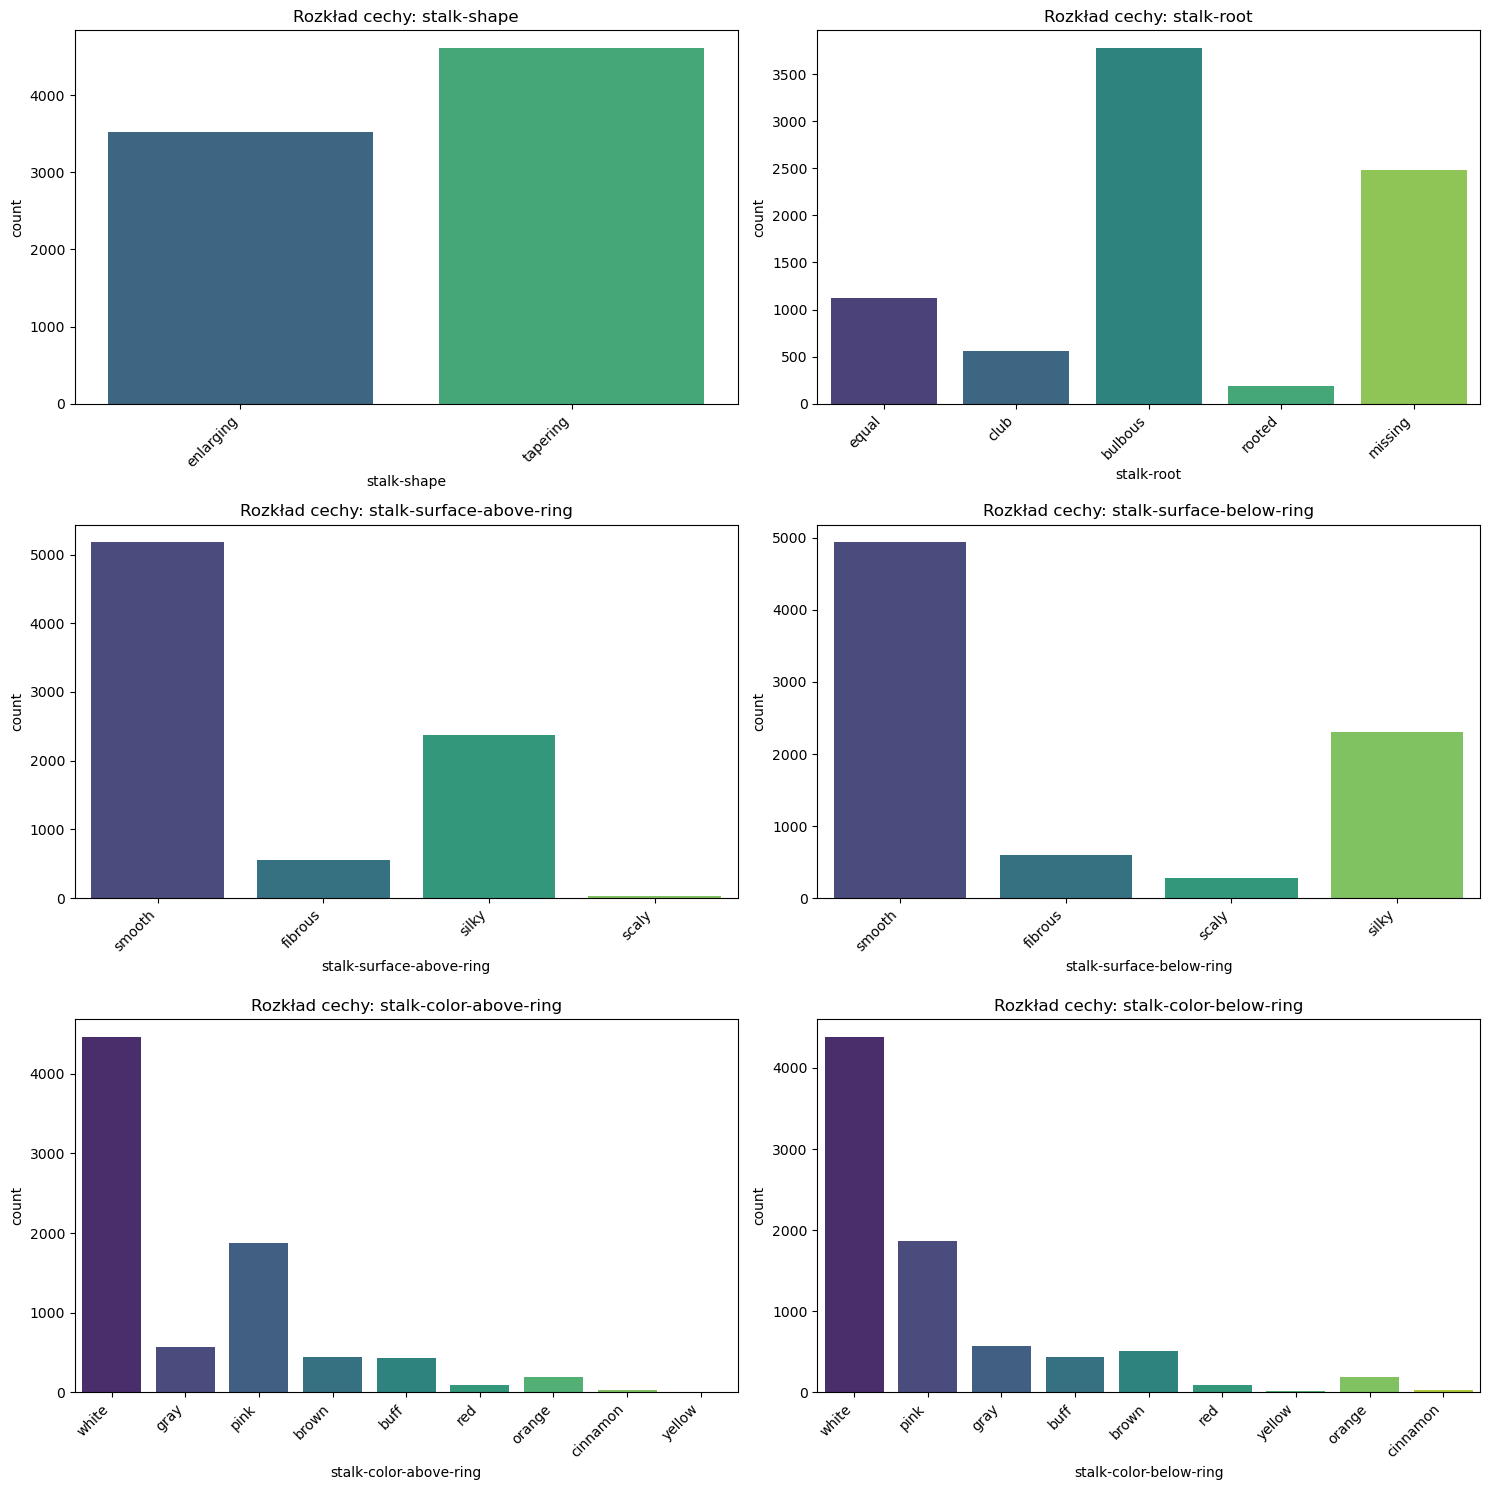

In [10]:
# Analiza cech łodygi
plt.figure(figsize=(15, 15))
features_group3 = ["stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring"]
for i, feature in enumerate(features_group3):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=data[feature], palette='viridis')
    plt.title(f"Rozkład cechy: {feature}")
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\1849268453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\1849268453.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')


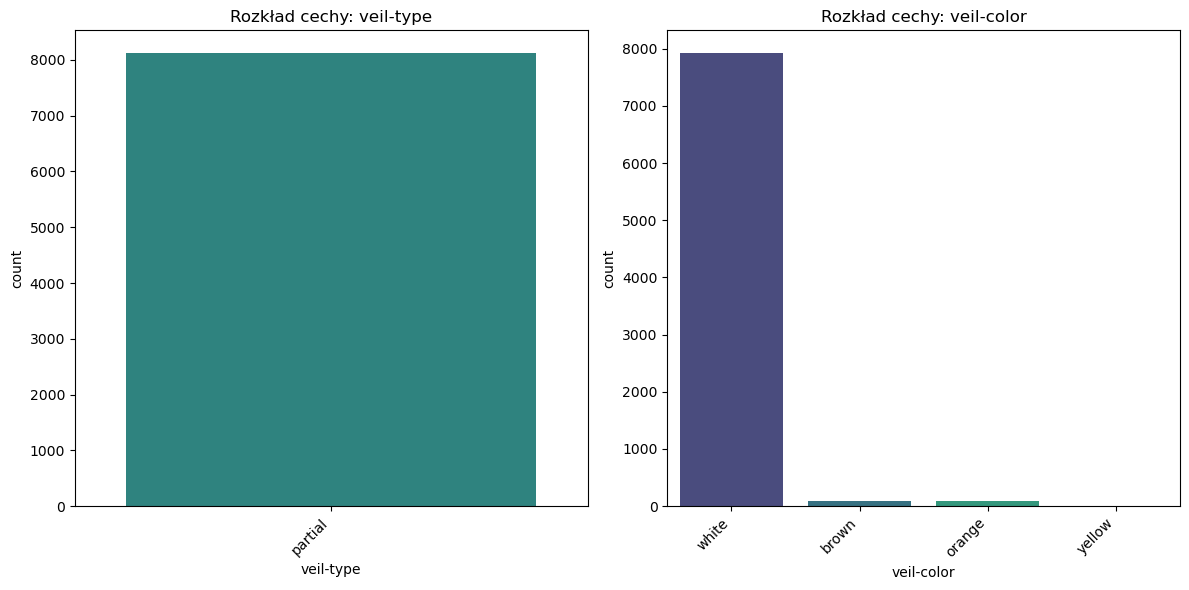

In [11]:
# Analiza cech osłony
plt.figure(figsize=(12, 6))
features_group1 = ["veil-type", "veil-color"]
for i, feature in enumerate(features_group1):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=data[feature], palette='viridis')
    plt.title(f"Rozkład cechy: {feature}")
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\3160112907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\3160112907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')


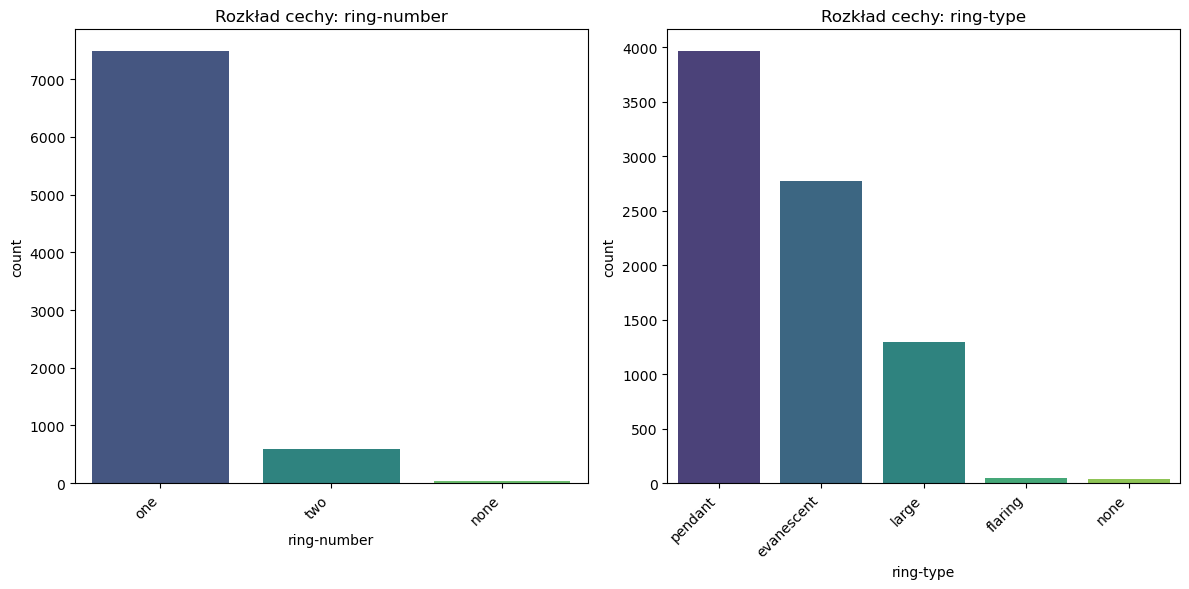

In [12]:
# Analiza cech pierścienia
plt.figure(figsize=(12, 6))
features_group1 = ["ring-number", "ring-type"]
for i, feature in enumerate(features_group1):
    plt.subplot(1, 2, i + 1)
    sns.countplot(x=data[feature], palette='viridis')
    plt.title(f"Rozkład cechy: {feature}")
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\2180187466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\2180187466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')
C:\Users\prikh\AppData\Local\Temp\ipykernel_22404\2180187466.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[feature], palette='viridis')


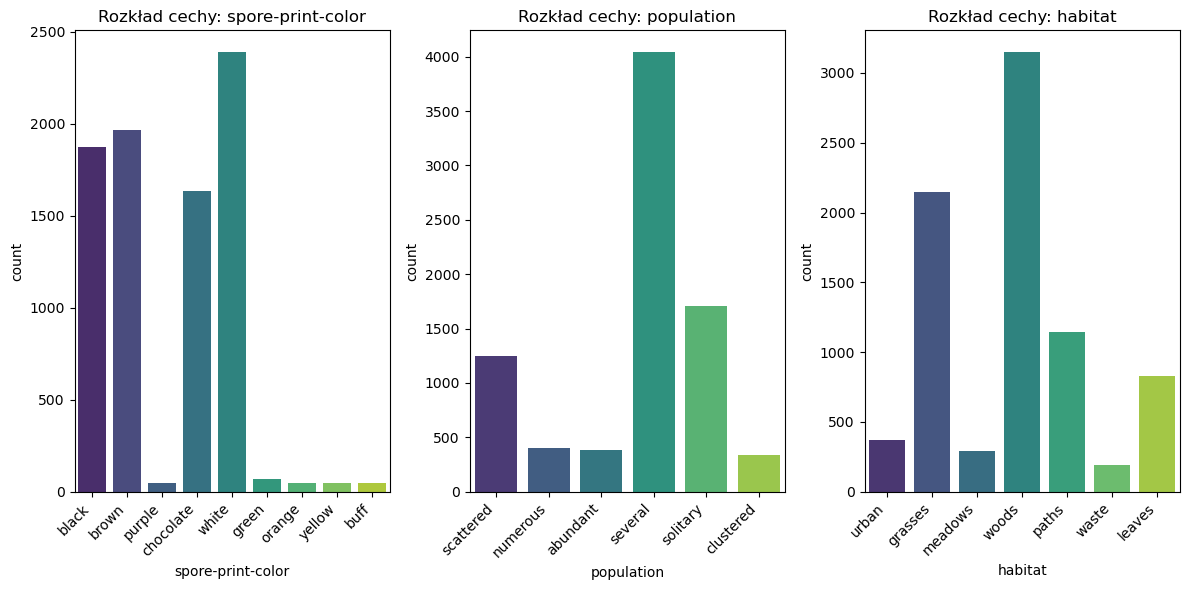

In [13]:
# Analiza spore print color, population i habitat
plt.figure(figsize=(12, 6))
features_group = ["spore-print-color", "population", "habitat"]
for i, feature in enumerate(features_group):
    plt.subplot(1, 3, i + 1)
    sns.countplot(x=data[feature], palette='viridis')
    plt.title(f"Rozkład cechy: {feature}")
    plt.xticks(rotation=45, ha='right')
    plt.subplots_adjust(wspace=0.4)
plt.tight_layout()
plt.show()

<h2>3. Przygotowanie danych</h2>

<h3>3.a Czyszczenie danych</h3>

In [14]:
# Sprawdzamy brakujące wartości
data.replace("?", np.nan, inplace=True)

def missing_values(df):
    missing = df.isnull().sum()
    return missing[missing > 0]

print("Brakujące wartości:")
print(missing_values(data))

Brakujące wartości:
Series([], dtype: int64)


<h3>Kodowanie zmiennych kategorycznych</h3>

In [15]:
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

<h3>Wybór cech - zastosowanie SelectKBest i chi2 do wyboru 10 najlepszych cech</h3>

In [16]:
X = data.drop(columns=["class"])
y = data["class"]

selector = SelectKBest(chi2, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Wybrane cechy:", selected_features)

Wybrane cechy: Index(['cap-surface', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'ring-type',
       'spore-print-color', 'population'],
      dtype='object')


<h2>4. Tworzenie modelu i ocena

<h3>Podział zbioru danych
<br>train_test_split() dzieli dane na zbiór treningowy (80%) i testowy (20%).<br>
Użycie stratify=y zapewnia, że proporcje klas (jadalne vs trujące) zostaną zachowane w obu podzbiorach.<br>
random_state=42 gwarantuje powtarzalność wyników.

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42, stratify=y)

<h3>Normalizacja

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<h3>Wybór algorytmów

Random Forest (Las losowy)
<br>n_estimators=100: Liczba drzew w lesie.
<br>random_state=42: Ustawienie ziarna losowości dla powtarzalności wyników.
<br>
<br>Support Vector Machine (SVM)
<br>kernel='linear': Użycie liniowego jądra SVM.
<br>
<br>K-Nearest Neighbors (KNN)
<br>n_neighbors=5: Liczba sąsiadów uwzględnianych w klasyfikacji.

In [19]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear'),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

<h3>Trening modeli


Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      0.99      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Macierz błędów:


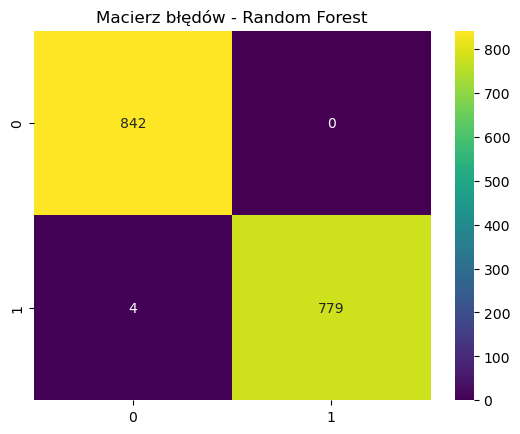


Model: SVM
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       842
           1       0.90      0.92      0.91       783

    accuracy                           0.91      1625
   macro avg       0.91      0.91      0.91      1625
weighted avg       0.91      0.91      0.91      1625

Macierz błędów:


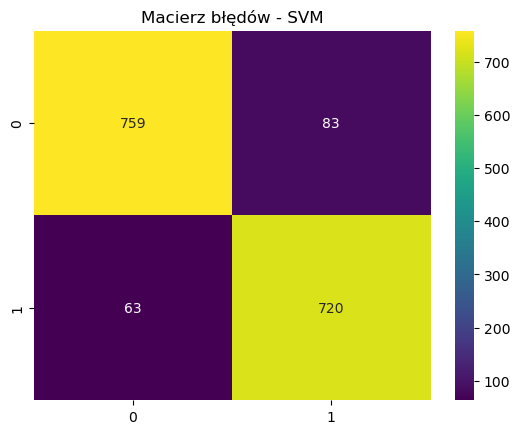


Model: KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       842
           1       1.00      0.99      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Macierz błędów:


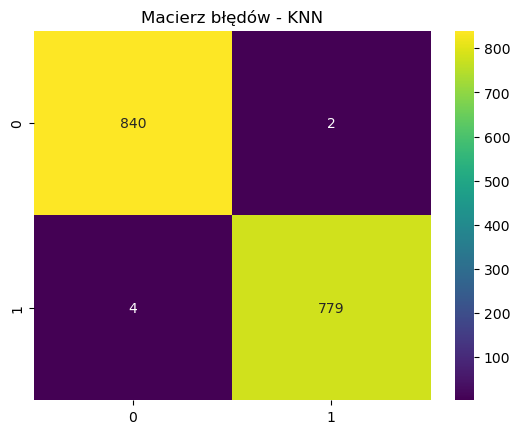

In [20]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"\nModel: {name}")
    print(classification_report(y_test, y_pred))
    print("Macierz błędów:")
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
    plt.title(f"Macierz błędów - {name}")
    plt.show()


<h3>Porównanie dokładności modeli

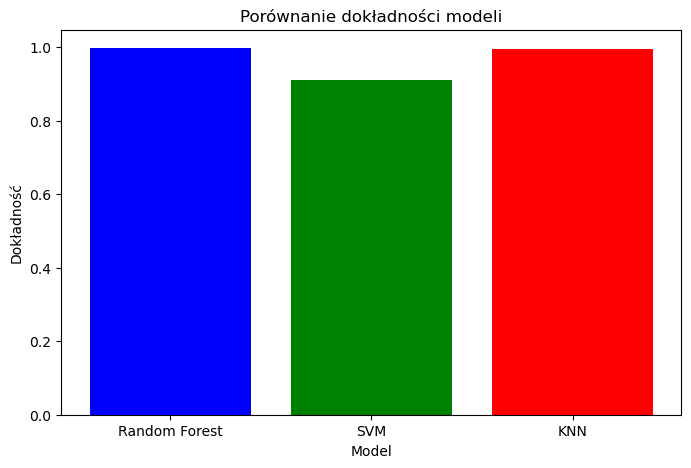

In [21]:
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("Dokładność")
plt.title("Porównanie dokładności modeli")
plt.show()

<h3>Najlepszy model

In [25]:
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Najlepszy model: {best_model_name} z dokładnością {results[best_model_name]:.4f}")

Najlepszy model: Random Forest z dokładnością 0.9975


<h3>Przykładowa predykcja

In [31]:
random_sample = X_test[np.random.randint(0, X_test.shape[0])].reshape(1, -1)
predicted_class = best_model.predict(random_sample)
predicted_label = "jadalny" if predicted_class[0] == 0 else "trujący"
print(f"Przykładowa predykcja: Model {best_model_name} przewiduje, że grzyb jest {predicted_label}.")

Przykładowa predykcja: Model Random Forest przewiduje, że grzyb jest jadalny.


<h3>Czynności poprawiające wynik

In [32]:
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    }
    grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print("Najlepsze parametry Random Forest:", grid_search.best_params_)
    best_model = grid_search.best_estimator_
    y_pred_tuned = best_model.predict(X_test)
    print("Dokładność po tuningu:", accuracy_score(y_test, y_pred_tuned))

Najlepsze parametry Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Dokładność po tuningu: 0.9975384615384615


<h2>Wnioski

Na podstawie przeprowadzonego projektu analizy danych dotyczących grzybów, można wyciągnąć następujące wnioski:

1. **Dokładność modeli**:
    - Najlepszy model to Random Forest, który osiągnął bardzo wysoką dokładność (powyżej 99%). Inne modele, takie jak SVM i KNN, również osiągnęły wysoką dokładność, ale nieco niższą niż Random Forest.

2. **Wybór cech**:
    - Zastosowanie metody SelectKBest z testem chi-kwadrat pozwoliło na wybór 10 najważniejszych cech, które mają największy wpływ na klasyfikację grzybów jako jadalne lub trujące. Wybrane cechy to m.in. powierzchnia kapelusza, obecność siniaków, odstępy między blaszkami, rozmiar blaszek, kolor blaszek, kolor trzonu powyżej i poniżej pierścienia, typ pierścienia, kolor zarodników oraz populacja.

3. **Wizualizacja danych**:
    - Wizualizacje danych pozwoliły na lepsze zrozumienie rozkładu poszczególnych cech w zbiorze danych. Na przykład, analiza rozkładu klas (jadalne vs trujące) pokazała, że zbiór danych jest zrównoważony, co jest korzystne dla treningu modeli.

4. **Czyszczenie danych**:
    - W projekcie zidentyfikowano i zastąpiono brakujące wartości, co jest kluczowe dla poprawnego działania modeli. Brakujące wartości w kolumnie "stalk-root" zostały zastąpione wartością "missing".

5. **Tuning hiperparametrów**:
    - Przeprowadzenie tuningu hiperparametrów dla modelu Random Forest za pomocą GridSearchCV pozwoliło na znalezienie optymalnych parametrów, co dodatkowo poprawiło dokładność modelu.

6. **Przykładowa predykcja**:
    - Przykładowa predykcja na losowej próbce danych pokazała, że model jest w stanie poprawnie klasyfikować grzyby jako jadalne lub trujące.

Podsumowując, projekt ten pokazuje, że odpowiednie przygotowanie danych, wybór cech, zastosowanie różnych modeli klasyfikacyjnych oraz tuning hiperparametrów mogą prowadzić do stworzenia bardzo dokładnego modelu klasyfikacyjnego. Model Random Forest okazał się najlepszy w tym przypadku, co sugeruje, że jest to skuteczna metoda dla tego typu problemów klasyfikacyjnych.